In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from sklearn.linear_model import LogisticRegression
from functools import partial

In [2]:
x1=2*np.random.random((1000,1))-1
x2=2*np.random.random((1000,1))-1

In [3]:
X0=np.array([])
X1=np.array([])
y=np.array([])
x=np.hstack((x1,x2))
for i in range(x.shape[0]):
    if 2*x[i,:][0]+(1.5*2)*x[i,:][1]+0.3-1.5*np.random.random()<0:
        y=np.append(y,np.array([0]))
        X0=np.hstack((X0,np.array([x[i,:][0],x[i,:][1]])))
    else:
        y=np.append(y,np.array([1]))
        X1=np.hstack((X1,np.array([x[i,:][0],x[i,:][1]])))

In [4]:
X0=X0.reshape(-1,2)
X1=X1.reshape(-1,2)

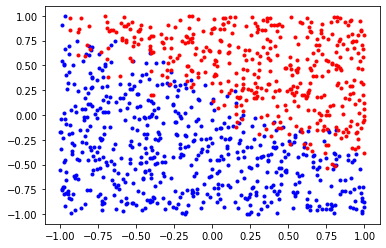

In [5]:
plt.plot(X0[:,0],X0[:,1],"b.",
        X1[:,0],X1[:,1],"r.")
plt.show()

In [6]:
X=np.copy(x)
m=x.shape[0]
n=x.shape[1]

In [7]:
def add1laX(X):
    a=np.ones_like(X[:,0]).reshape((X.shape[0],1))
    return np.hstack((a,X))

def g(x):
    a=(1+np.exp(-x))
    return 1/a

def H(teta,X):
    return teta.T.dot(X)

def h(teta,X):
    return g(H(teta,X))

def cost(Y,y):  #se scrie pe ramuri lol... dar pentru y in {0,1} e safe 
    return -(y*np.log(Y)+(1-y)*np.log(1-Y))

def J(teta,X,y,l):
    a=1/m
    b=l/(2*m)
    s=0
    S=0
    for i in range(1,n):
        S+=teta[i]**2    
    for i in range(m):
       s+=cost(h(teta,X[i,:]),y[i])
    return a*s+b*S

def dJdteta(k,teta,X,y,l):
    a=1/m
    s=0
    if k==0:
        for i in range(m):
            s+=(h(teta,X[i,:])-y[i])*X[i,k]
    else:
        for i in range(m):
            s+=(h(teta,X[i,:])-y[i])*X[i,k]-(l/m)*teta[k]
    return a*s

def gradd(teta,alpha,X,y,l):
    temp=np.copy(teta)
    for j in range(teta.shape[0]):
        temp[j]-=alpha*dJdteta(j,teta,X,y,l)
    return temp

In [8]:
X=add1laX(X)

In [9]:
teta=np.random.randn(X.shape[1])
teta

array([-0.91857695,  1.21309547, -0.40078988])

In [10]:
alpha=0.3

In [11]:
l=0

In [12]:
J(teta,X,y,l)

0.7187696642925309

In [13]:
for t in range(250):
    teta=gradd(teta,alpha,X,y,l)
    print(J(teta,X,y,l))

0.6994413808570749
0.6811509997842675
0.6638443240149308
0.6474675017956758
0.6319676316353178
0.6172932527904292
0.6033947254867494
0.5902245096302826
0.577737353575232
0.5658904058648234
0.5546432630739041
0.5439579662876665
0.533798957640591
0.5241330069505576
0.5149291169935943
0.5061584144993466
0.4977940325852102
0.4898109891324874
0.48218606455920937
0.47489768156292966
0.4679257886828541
0.4612517489486376
0.45485823442438716
0.44872912710214924
0.4428494263313982
0.43720516277363675
0.43178331872996034
0.4265717545923193
0.4215591411062138
0.4167348970954431
0.4120891322817955
0.40761259482888396
0.4032966232457187
0.39913310229877413
0.3951144225990131
0.3912334435506248
0.3874834593698415
0.3838581679042225
0.3803516420044409
0.37695830322150475
0.37367289762219486
0.3704904735340399
0.36740636104843816
0.36441615312642694
0.36151568816612334
0.358701033904202
0.3559684725358011
0.3533144869481741
0.35073574797334073
0.34822910257383605
0.345791562883775
0.343420296034635
0.

In [14]:
teta

array([-0.70480841,  2.609417  ,  4.21031026])

In [15]:
xx=np.linspace(-1,1,200)
a=(-teta[0]-teta[1]*xx)
b=teta[2]
yy=a/b

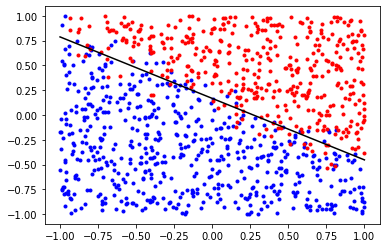

In [16]:
plt.plot(X0[:,0],X0[:,1],"b.",
        X1[:,0],X1[:,1],"r.",
        xx,yy,"k")
plt.show()

In [17]:
XX=np.hstack( (X, (X[:,1]**2).reshape(-1,1), (X[:,1]*X[:,2]).reshape(-1,1), (X[:,2]**2).reshape(-1,1) ) )
XX

array([[ 1.        , -0.48346145, -0.2886643 ,  0.23373497,  0.13955806,
         0.08332708],
       [ 1.        , -0.26848612,  0.45249781,  0.0720848 , -0.12148938,
         0.20475426],
       [ 1.        ,  0.89565541,  0.16173968,  0.80219861,  0.14486302,
         0.02615972],
       ...,
       [ 1.        ,  0.63490789, -0.77418015,  0.40310803, -0.49153309,
         0.5993549 ],
       [ 1.        , -0.07323083, -0.37036511,  0.00536275,  0.02712214,
         0.13717032],
       [ 1.        ,  0.68948625,  0.76654401,  0.47539129,  0.52852155,
         0.58758972]])

In [18]:
tetaXX=np.random.randn(XX.shape[1])
tetaXX

array([-0.2956311 , -0.70341806,  0.14658351, -0.6576204 , -1.00442001,
       -1.96911957])

In [19]:
alpha=0.3
l=0
J(tetaXX,XX,y,l)

0.9302834344170211

In [20]:
for t in range(250):
    tetaXX=gradd(tetaXX,alpha,XX,y,l)
    print(J(tetaXX,XX,y,l))

0.8990633655628664
0.8696006332995514
0.8418187187526026
0.8156386256558009
0.7909799337752416
0.7677617574536963
0.7459035993592559
0.7253260948808751
0.7059516469318331
0.6877049541787585
0.6705134380079547
0.6543075750415337
0.6390211429186693
0.6245913875435826
0.6109591202168692
0.5980687531089018
0.5858682814572895
0.5743092206947439
0.5633465064392058
0.552938364898008
0.5430461607489409
0.5336342289694571
0.52466969640755
0.5161222981495877
0.5079641929723174
0.5001697813999287
0.4927155291515911
0.48557979808379836
0.4787426861221983
0.4721858771493857
0.46589250137204474
0.45984700633133124
0.4540350384389187
0.44844333470981096
0.44305962421229894
0.43787253865553755
0.43287153147661694
0.4280468047628454
0.42338924334349026
0.41889035540189246
0.41454221898800503
0.41033743384889504
0.40626907803675455
0.40233066879828644
0.39851612729367536
0.3948197467366441
0.3912361635881719
0.3877603314749853
0.3843874975393546
0.38111318095918545
0.3779331534066362
0.3748434212398799


In [21]:
tetaXX

array([-0.40600826,  2.56377151,  4.29766395, -0.40290585,  0.01109772,
       -0.78127641])

practic ce e mai sus ne da $-0.71+2.54x+4.08y-0.18x^{2}+0.72xy+0.58y^{2}=0$ la momenul acestei rulari lol

In [22]:
def z(x,yyy):
    return tetaXX[0]+tetaXX[1]*x+tetaXX[2]*yyy+tetaXX[3]*(x**2)+tetaXX[4]*(x*yyy)+tetaXX[5]*(yyy**2)

In [23]:
x_window = -1, 1
y_window = -1, 1
xs = []
ys = []
for x in np.linspace(*x_window, num=200):
    try:
        yyy = scipy.optimize.brentq(partial(z, x), *y_window)
    except ValueError:
        pass
    else:
        xs.append(x)
        ys.append(yyy)

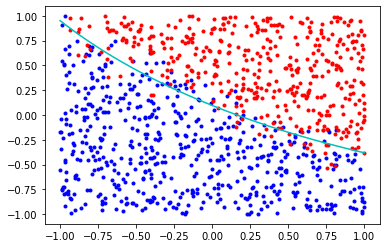

In [24]:
plt.plot(X0[:,0],X0[:,1],"b.",
        X1[:,0],X1[:,1],"r.",
        #xx,yy,"k",
        xs,ys,"c")
plt.show()

In [25]:
XXX=np.hstack( (XX, (X[:,1]**3).reshape(-1,1), ((X[:,1]**2)*X[:,2]).reshape(-1,1), (X[:,1]*(X[:,2]**2)).reshape(-1,1), (X[:,2]**3).reshape(-1,1) ) )
XXX.shape

(1000, 10)

In [26]:
tetaXXX=np.random.randn(XXX.shape[1])
tetaXXX

array([ 0.77464867, -0.51252725, -1.67169092, -0.60354466, -0.43918156,
       -1.76376255,  1.03833741,  1.22102789, -0.29137437, -0.53735724])

In [27]:
alpha=0.3
l=0
J(tetaXXX,XXX,y,l)

1.17067165485619

In [28]:
for t in range(250):
    tetaXXX=gradd(tetaXXX,alpha,XXX,y,l)
    print(J(tetaXXX,XXX,y,l))

1.1238453059442473
1.0796926817367902
1.038079390587586
0.9988709803349779
0.9619361368670886
0.9271486109012121
0.8943881595440478
0.863540788197237
0.8344985460163904
0.8071590812073889
0.7814251112007735
0.7572039134850475
0.7344068995169831
0.7129492989470605
0.6927499553882174
0.673731217996972
0.655818904214967
0.6389423065160025
0.623034218025057
0.6080309565706191
0.5938723725312536
0.5805018315834589
0.5678661684274737
0.5559156114152379
0.5446036806684481
0.5338870638708243
0.5237254746535566
0.5140814985961091
0.5049204315489412
0.496210114425749
0.4879207679428123
0.48002483009372504
0.4724967984971341
0.46531307917543896
0.45845184282774726
0.4518928892529159
0.445617520252942
0.4396084210946033
0.43384955041730594
0.4283260383373148
0.4230240924027536
0.41793091099146723
0.4130346037073424
0.40832411831400406
0.4037891737425882
0.39942019871881723
0.39520827557032245
0.39114508879596127
0.38722287800257976
0.3834343948400413
0.37977286359126167
0.3762319450997405
0.372805

In [29]:
tetaXXX

array([-0.33807955,  1.79437729,  3.06577847, -0.73831348,  0.24987987,
       -0.90621435,  2.17881718,  2.1448412 , -0.29397207,  1.88922618])

In [30]:
def z(x,y):
    return (tetaXXX[0]+tetaXXX[1]*x+tetaXXX[2]*y+tetaXXX[3]*(x**2)+tetaXXX[4]*(x*y)+tetaXXX[5]*(y**2)+tetaXXX[6]*(x**3)+tetaXXX[7]*((x**2)*y)+tetaXXX[8]*(x*(y**2))+tetaXXX[9]*(y**3))

In [31]:
x_window = -1, 1
y_window = -1, 1
xss = []
yss = []
for x in np.linspace(*x_window, num=200):
    try:
        yyyyy = scipy.optimize.brentq(partial(z, x), *y_window)
    except ValueError:
        pass
    else:
        xss.append(x)
        yss.append(yyyyy)

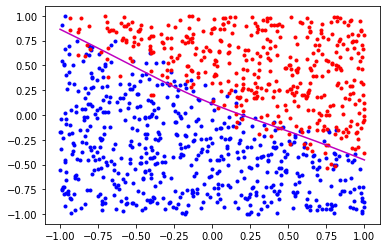

In [32]:
plt.plot(X0[:,0],X0[:,1],"b.",
        X1[:,0],X1[:,1],"r.",
        #xx,yy,"k",
        #xs,ys,"c",
        xss,yss,"m")
plt.show()